In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("problem2.csv")
data

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN
...,...,...,...,...,...,...,...
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0
136929,Zimbabwe,2021-11-29,134226.0,4706.0,3067.0,15092171.0,17809.0


In [2]:
data['ratio']=data['total_cases']/data['population']

In [4]:
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136931 entries, 0 to 136930
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   location          136931 non-null  object        
 1   date              136931 non-null  datetime64[ns]
 2   total_cases       129343 non-null  float64       
 3   total_deaths      118074 non-null  float64       
 4   new_tests         57061 non-null   float64       
 5   population        135951 non-null  float64       
 6   new_vaccinations  29414 non-null   float64       
 7   ratio             128680 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.4+ MB


In [5]:
data.isna().sum()

location                 0
date                     0
total_cases           7588
total_deaths         18857
new_tests            79870
population             980
new_vaccinations    107517
ratio                 8251
dtype: int64

In [9]:
data[data.new_vaccinations.isna()]

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN,1.255164e-07
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN,1.255164e-07
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN,1.255164e-07
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN,1.255164e-07
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN,1.255164e-07
...,...,...,...,...,...,...,...,...
136856,Zimbabwe,2021-09-17,127632.0,4562.0,4610.0,15092171.0,NaN,8.456835e-03
136857,Zimbabwe,2021-09-18,127739.0,4563.0,3543.0,15092171.0,NaN,8.463925e-03
136917,Zimbabwe,2021-11-17,133557.0,4699.0,2841.0,15092171.0,NaN,8.849423e-03
136918,Zimbabwe,2021-11-18,133593.0,4699.0,3925.0,15092171.0,NaN,8.851808e-03


In [11]:
import matplotlib.pyplot as plt
data=data.fillna(0)
data=data[data['date']!='2021-11-30']
data.head(3)

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07


In [12]:
data=data[data['population']!=0]

In [13]:
import warnings
warnings.filterwarnings('ignore')

for location in data.location.unique():
    lo=data[data.location==location]
    
#일일 확진자
data.loc[lo.index, 'new_cases']=lo.total_cases.diff().values
data.loc[lo.index[0], 'new_caes']=lo['total_cases'].values[0]

#일일 사망자
data.loc[lo.index, 'new_deaths']=lo.total_deaths.diff().values
data.loc[lo.index, 'new_deaths']=lo['total_deaths'].values[0]

#누적 백신 접종자
data.loc[lo.index, 'total_vaccinations']=lo['new_vaccinations'].cumsum().values

#일주일 검사자 합계
data.loc[lo.index, '7days_new_cases']=lo['new_tests'].rolling(7).sum().fillna(0).values

In [16]:
data

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_caes,new_deaths,total_vaccinations,7days_new_cases
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136925,Zimbabwe,2021-11-25,133774.0,4704.0,2291.0,15092171.0,26173.0,8.863801e-03,27.0,NaN,0.0,5709051.0,17716.0
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0,8.867909e-03,62.0,NaN,0.0,5740336.0,17785.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0,8.867909e-03,0.0,NaN,0.0,5756447.0,19518.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0,8.875529e-03,115.0,NaN,0.0,5764699.0,19348.0


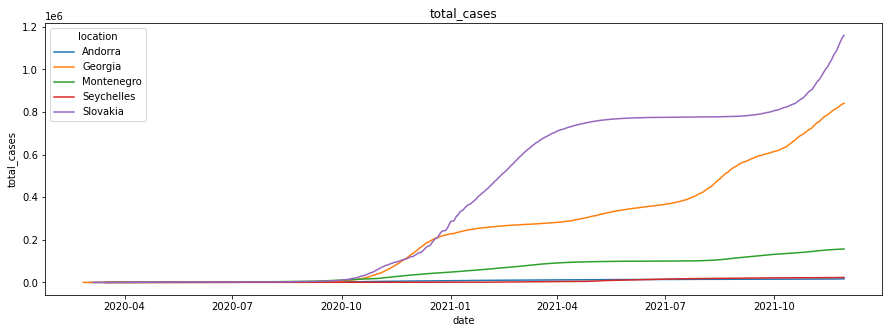

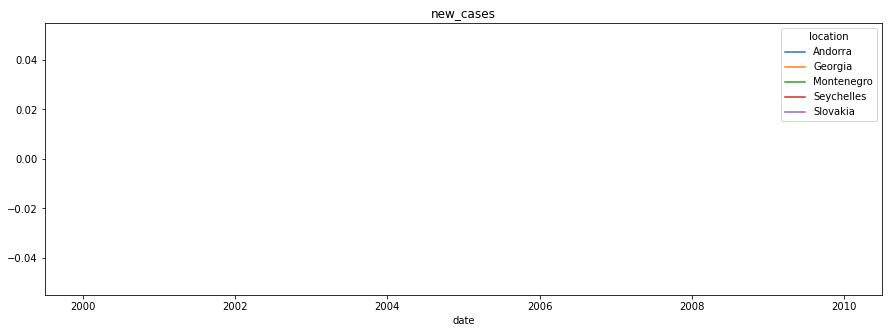

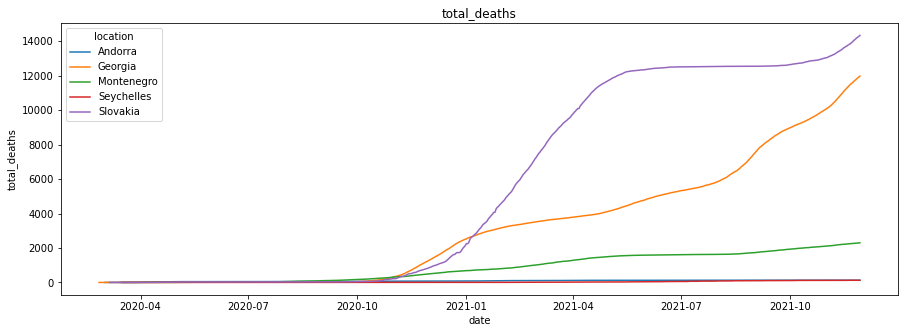

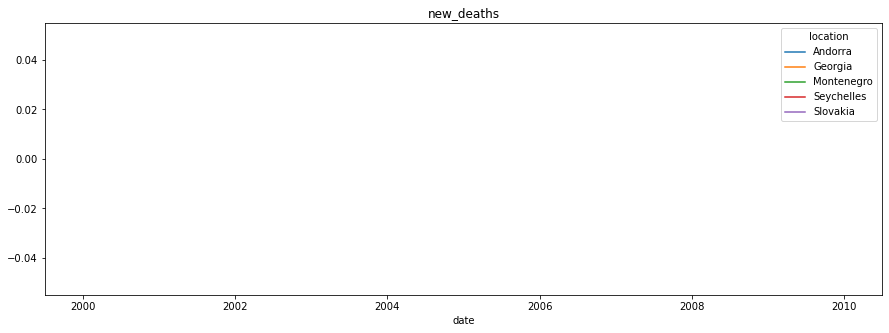

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#나라별 마지막 행만 출력
#ratio(인구대비 확진자 비율) 순으로 정렬, 상위 5개 나라 저장

locations=data.groupby(['location']).tail(1).sort_values('ratio', ascending=False).location.head(5).values
target=data[data.location.isin(locations)].reset_index(drop=True)

#누적확진자, 신규확진자, 누적 사망자, 신규사망자 plot
for v in ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']:
    plt.figure(figsize=(15,5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')
    plt.show()